In [159]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

import data_io.DataLoader
reload(data_io.DataLoader)
from data_io.DataLoader import DataLoader

from matplotlib import pyplot as plt
import numpy as np

import model1
reload(model1)
from model1 import Model1

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
dl = DataLoader("/Users/iankurgarg/Code/Vision/Project-1/image-classification/images")

face, non_face = dl.load_data(train=1)

In [51]:
print face.shape
print non_face.shape

trainX = np.concatenate((face, non_face))
trainY = [1]*1000 + [0]*1000
print trainX.shape

(1000, 3600)
(1000, 3600)
(2000, 3600)


In [42]:
mean_face = np.mean(face, axis=0)

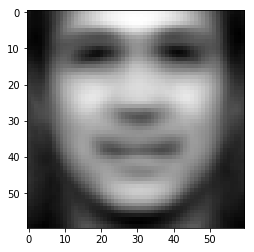

In [43]:
plt.imshow(mean_face.reshape((60,60)), cmap="gray");
plt.show();

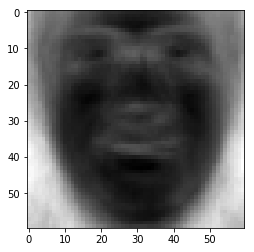

In [73]:
cov_face = np.cov(face, rowvar=False)

cov_diag = np.diag(cov_face)
plt.imshow(cov_diag.reshape((60,60)), cmap="gray");
plt.show();

In [45]:
print mean_face.shape
print cov_face.shape

(3600,)
(3600, 3600)


In [52]:
scaler_model = StandardScaler()
scaledX = scaler_model.fit_transform(trainX, trainY)

In [100]:
scaledX.shape

(2000, 3600)

In [101]:
pca_model = PCA(n_components=70)
pcaX = pca_model.fit_transform(scaledX)

In [104]:
print pca_model.components_.shape
print pcaX.shape

(70, 3600)
(2000, 70)


In [105]:
# First 70 features explain approximately 95% variance.
print pca_model.explained_variance_ratio_[:70].sum()

0.947556426936


In [106]:
pca_face = pcaX[:1000]
pca_non_face = pcaX[1000:]

print pca_non_face.shape

(1000, 70)


In [107]:
mean_faceX = np.mean(pca_face, axis=0)
cov_faceX = np.cov(pca_face, rowvar=False)

mean_non_faceX = np.mean(pca_non_face, axis=0)
cov_non_faceX = np.cov(pca_non_face, rowvar=False)

In [108]:
dist1 = multivariate_normal(mean=mean_faceX, cov=cov_faceX)
dist2 = multivariate_normal(mean=mean_non_faceX, cov=cov_non_faceX)

In [143]:
len(test_faces[0].shape)

1

In [121]:
def predict(img):
    img = img.reshape(1, -1)
    scaled_img = scaler_model.transform(img)
    pca_img = pca_model.transform(scaled_img)
    a = dist1.pdf(pca_img)
    b = dist2.pdf(pca_img)
    
    return a / (a+b)
    

In [ ]:
test_faces, test_non_faces = dl.load_data(train=0)

In [138]:
false_negatives = 0
for i in range(100):
    img = test_faces[i]
    p = predict(img)
    if (p < 0.5):
        false_negatives += 1

In [139]:
false_negatives

0

In [117]:
img = test_non_faces[0]
img = img.reshape(1, -1)
print img.shape
scaled_img = scaler_model.transform(img)
print scaled_img.shape
pca_img = pca_model.transform(scaled_img)
print pca_img.shape

(1, 3600)
(1, 3600)
(1, 70)


In [118]:
a = dist1.pdf(pca_img)
b = dist2.pdf(pca_img)
print a , b

3.13315883809e-67 5.63196753519e-42


In [ ]:
# mean_face = np.mean(faces, axis=0)
mean_face = faces[999]

In [ ]:
mean_face = dl.unflatten_images([mean_face])[0]

In [ ]:
mean_face.shape

In [ ]:
plt.imshow(mean_face); plt.show()

In [160]:
m = Model1()
m.fit(face, non_face)

In [166]:
testX = np.concatenate((test_faces, test_non_faces))
predicted = m.predict(testX)
actual = [1]*len(test_faces) + [0]*len(test_non_faces)

In [167]:
print m.true_positives(actual, predicted), m.true_negatives(actual, predicted), m.false_positives(actual, predicted), m.false_negatives(actual, predicted)

100 80 20 0
